In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# creating linear dataset
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

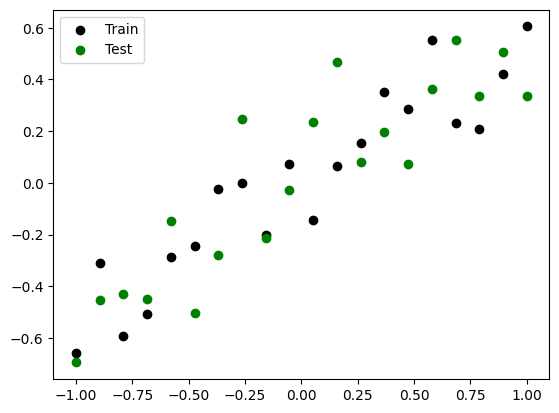

In [6]:
# scatter plot to visualize data
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='green', label='Test')
plt.legend()
plt.show()

In [7]:
# Neural Network Architecture
model1_1 = Sequential()
model1_1.add(Dense(128, input_dim=1, activation='relu'))
model1_1.add(Dense(128, input_dim=1, activation='relu'))
model1_1.add(Dense(1, activation='linear'))

C:\Users\12368\OneDrive\Desktop\DeepLearning\tfvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model1_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model1_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history1 = model1_1.fit(X_train, X_test, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - loss: 0.3857 - mse: 0.3857 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0877 - mse: 0.0877 - val_loss: 0.1182 - val_mse: 0.1182
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.2858 - val_mse: 0.2858
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.2679 - val_mse: 0.2679
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.1600 - val_mse: 0.1600
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0243 - mse:

In [ ]:
# evaluate the model
_, train_mse = model1_1.evaluate(X_train, y_train, verbose=1)
_, test_mse = model1_1.evaluate(X_test, y_test, verbose=1)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

In [ ]:
y_pred1 = model1_1.predict(X_test)

In [ ]:

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
# Training the NN with dropouts
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [ ]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

In [ ]:
y_pred2 = model_2.predict(X_test)

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()